<h1>Regi Rate Alert</h1>   


In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
from scipy import stats
from scipy.stats import norm
from fbprophet import Prophet
import logging

logger = logging.getLogger('pandas_gbq')
logger.propagate = False 
logging.getLogger().disabled = True

q = """
SELECT  *, format_datetime('%A',cast(create_date as datetime)) as dayName
FROM `nyt-bigquery-beta-workspace.Cooking.CK_RegiRate` 
ORDER BY create_date desc 
"""
# importing the data
df = pd.read_gbq(q,
    project_id = 'nyt-bigquery-beta-workspace',
    dialect='standard')

# Descriptive statistics, data type, data preview 
print(df.describe(), ' \n \n', '*Data Types Below* \n \n', df.dtypes ,' \n \n', df.head(n=6))

INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server unavailable.


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=GQS077Mwaw2POrENXQqMTsHk4Ijmt9&prompt=consent&access_type=offline
Enter the authorization code: 4/tgGvnU2TLkCRxmvr9mOejHK1SD72vCxJ01nvwVRe3cLK-ceGX5enslM
              agents        regis   regi_rate
count     173.000000   173.000000  173.000000
mean   238105.161850  4232.578035    1.755708
std     49279.218697  1417.707965    0.318492
min    160354.000000  1282.000000    0.626757
25%    200431.000000  3313.000000    1.569159
50%    232607.000000  3765.000000    1.711465
75%    269725.000000  4967.000000    1.937284
max    417921.000000  9330.000000    2.664537  
 
 *Data Types Below* 
 
 create_date    datetime64[ns]
agents                  int64
regis                   int64
regi_

Text(0.5, 0, 'regi_rate')

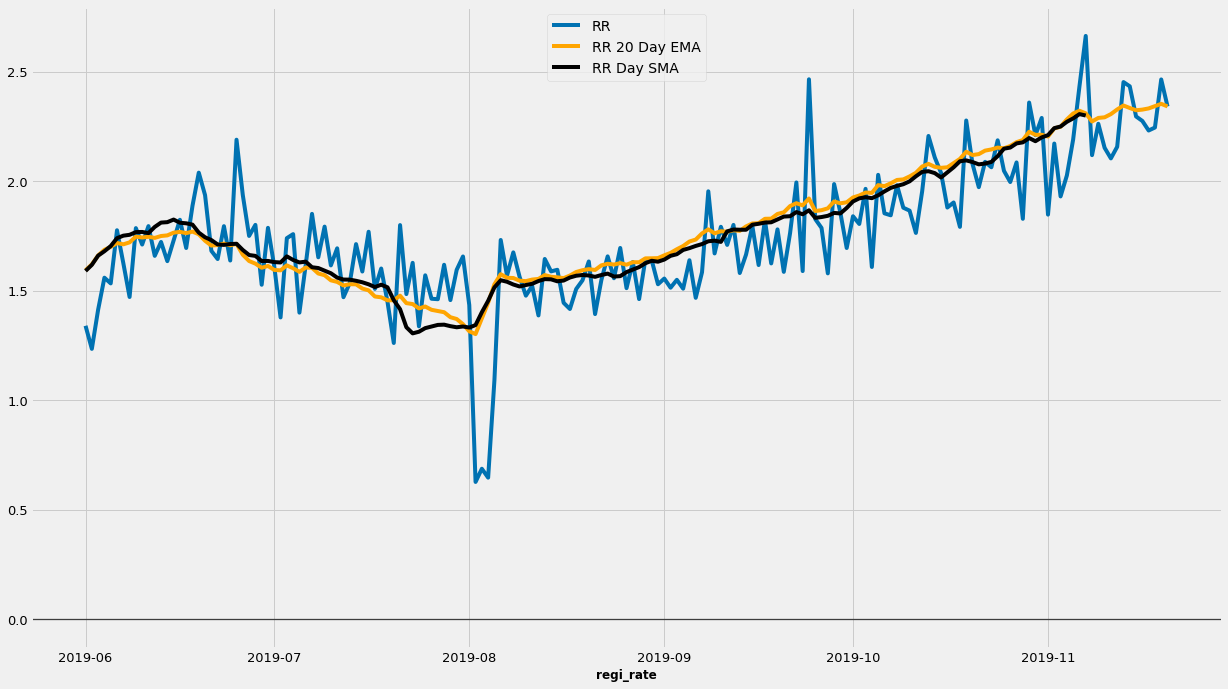

In [ ]:
%matplotlib inline
style.use('fivethirtyeight')
rcParams['figure.figsize'] = 19,11

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# Rolling Averages
rolling_mean = df.regi_rate.rolling(window=14).mean()
exp1 = df.regi_rate.ewm(span=20, adjust=False).mean()
#ax = sb.lineplot(x="FT_start_date", y="CK", data=dfnew, color = colors[5])
plt.plot(df['create_date'], df['regi_rate'], label='RR', color=colors[5])
#plt.plot(df['FT_start_date'], df['Core'], label='Core FT', color='red')
plt.plot(df['create_date'], exp1, label='RR 20 Day EMA', color='orange')
plt.plot(df['create_date'], rolling_mean, label='RR Day SMA', color=colors[0])

plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.legend(loc='upper center')
plt.xlabel('regi_rate',fontsize=12, weight='bold')
#ax.set_xlim(left = '2019', right = '2019')

# Remove the label of the x-axis
#plt.xaxis.label.set_visible(False)
#plt.yaxis.label.set_visible(False)

# The signature bar
#ax.get_xlim()
#plt.text(x = ax.get_xlim()[0].astype(int) - 18,y = 70, s = ' ©NYT Cooking ',fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')
#print(ax.get_xlim()[0].astype(int))
#ax.get_xlim()[0]

# Adding a title and a subtitle
#plt.text(x = (df['create_date'][320]), y = 62000, s = "Cooking Free Trial Starts",
#              fontsize = 30, weight = 'bold', alpha = .75)
#plt.text(x = (df['FT_start_date'][130]), y = 49000, s = "*EMA: Exponential Moving Average",
#               fontsize = 11, alpha = .70, color='black')
#plt.text(x = (df['create_date'][80]), y = 40000, s = "<-- Ecom Bug",
#             fontsize = 13,weight = 'bold', alpha = .90, color='black')

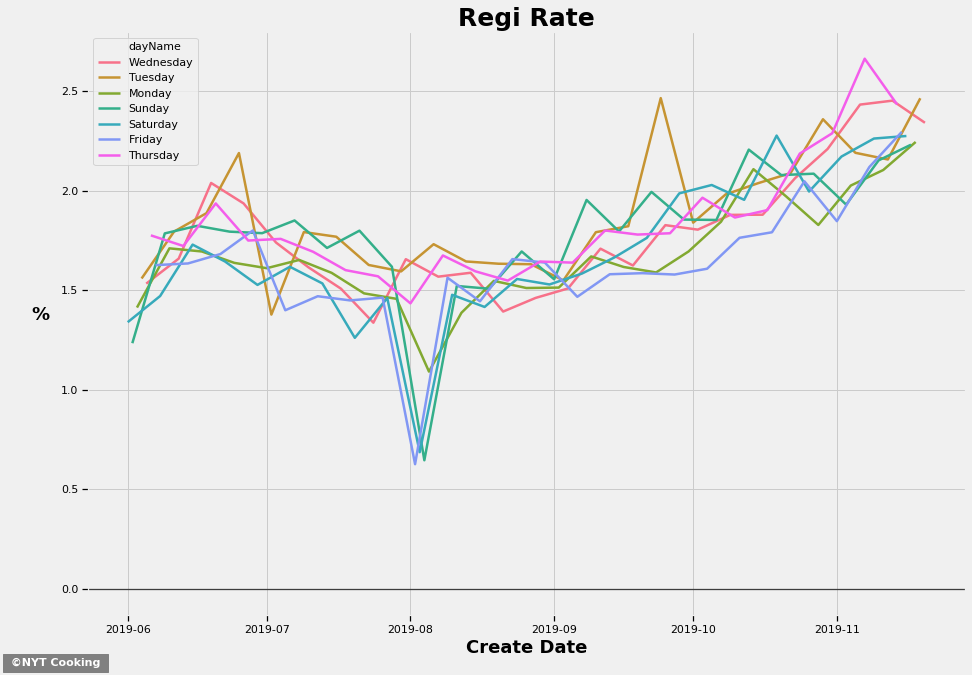

In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')   #bmh, ggplot,seaborn-notebook,seaborn-deep,dark_background
rcParams['figure.figsize'] = 14,10

sb.set_context("notebook",font_scale=1.001,rc={"lines.linewidth":2.5})
sb.lineplot(x='create_date', y='regi_rate', hue="dayName", data=df)   # Percent Hit WALL 
#sb.lineplot(x="day", y="hitpaywall", hue="dayName", data=df)   # Number Hit Wall 
plt.title('Regi Rate',fontsize=25,weight='bold')
plt.ylabel('%     ', fontsize=18, rotation=0, weight='bold')
plt.xlabel('Create Date',fontsize=18, weight='bold')
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#plt.text(x=1, y=1000, s='NYT Cooking', fontsize=9, color='#f0f0f0',backgroundcolor='grey')
plt.figtext(0, 0,' ©NYT Cooking ', fontsize=11, color='white',backgroundcolor='grey',weight= 'bold') #rotation=0, #color='black')
plt.show() 

In [ ]:
df['month'] = df['FT_start_date'].dt.month

df1 = df[df['month'] != 11]

Text(1, 195000, 'Cooking vs Core Regis: Free Trial Starts')

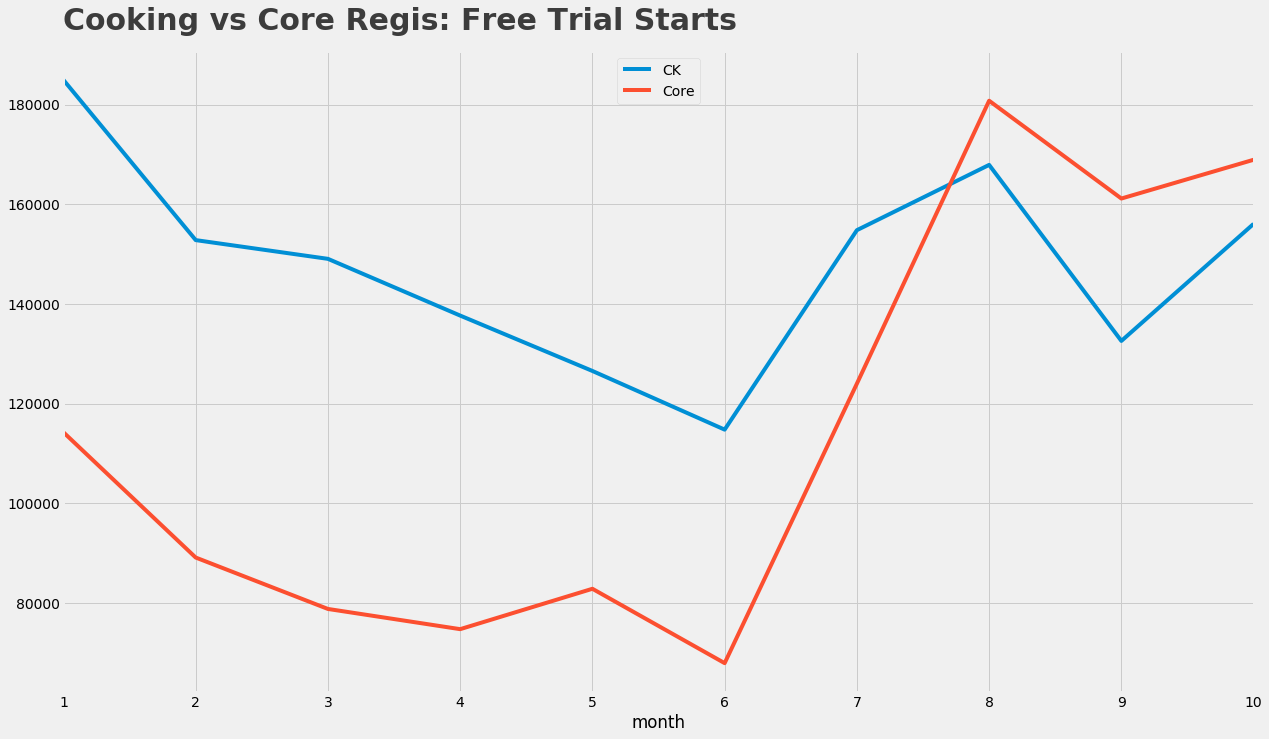

In [ ]:
df1.groupby(['month'])['CK'].sum().plot()
df1.groupby(['month'])['Core'].sum().plot()
plt.legend(loc='upper center')
plt.text(x = (df['month'][0]), y = 195000, s = "Cooking vs Core Regis: Free Trial Starts",
               fontsize = 30, weight = 'bold', alpha = .75)
#plt.axhline(y = 10000, color = 'black', linewidth = 1.3, alpha = .7)




In [ ]:
%matplotlib inline
style.use('fivethirtyeight')
rcParams['figure.figsize'] = 19,11

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# Rolling Averages
#rolling_mean = dfnew.starts.rolling(window=14).mean()
exp1 = df.CK.ewm(span=50, adjust=False).mean()
exp2 = df.Core.ewm(span=50, adjust=False).mean()

#ax = sb.lineplot(x="FT_start_date", y="CK", data=dfnew, color = colors[5])
plt.plot(df['month'], df['CK'], label='CK FT', color=colors[5])
plt.plot(df['month'], df['Core'], label='Core FT', color='red')
#plt.plot(df['FT_start_date'], exp1, label='CK 50 Day EMA', color='orange')
#plt.plot(df['FT_start_date'], exp2, label='Core 50 Day EMA', color='black')
#plt.plot(df['start_date'], rolling_mean, label='14 Day SMA', color=colors[0])
#plt.plot(df['start_date'], df.groupby(['month']).min().starts, label='14 Day SMA', color=colors[4])
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.legend(loc='upper center')
plt.ylabel('# of FTs                        ', fontsize=10, rotation=0, weight='bold')
plt.xlabel('FT Start Date',fontsize=12, weight='bold')
#ax.set_xlim(left = '2019', right = '2019')


# Remove the label of the x-axis
#plt.xaxis.label.set_visible(False)
#plt.yaxis.label.set_visible(False)

# The signature bar
#ax.get_xlim()
#plt.text(x = ax.get_xlim()[0].astype(int) - 18,y = 70, s = ' ©NYT Cooking ',fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')
#print(ax.get_xlim()[0].astype(int))
#ax.get_xlim()[0]


# Adding a title and a subtitle
plt.text(x = (df['month'][0]), y = 28000, s = "Cooking vs Core Regis: Free Trial Starts",
               fontsize = 30, weight = 'bold', alpha = .75)
#plt.text(x = (df['FT_start_date'][130]), y = 49000, s = "*EMA: Exponential Moving Average",
#               fontsize = 11, alpha = .70, color='black')
#plt.text(x = (df['month'][240]), y = 18000, s = "<-- Ecom Bug",
 #             fontsize = 13,weight = 'bold', alpha = .90, color='black')

In [ ]:
from scipy.stats import gaussian_kde

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=25)

plt.hist(dfnew.starts, **kwargs)

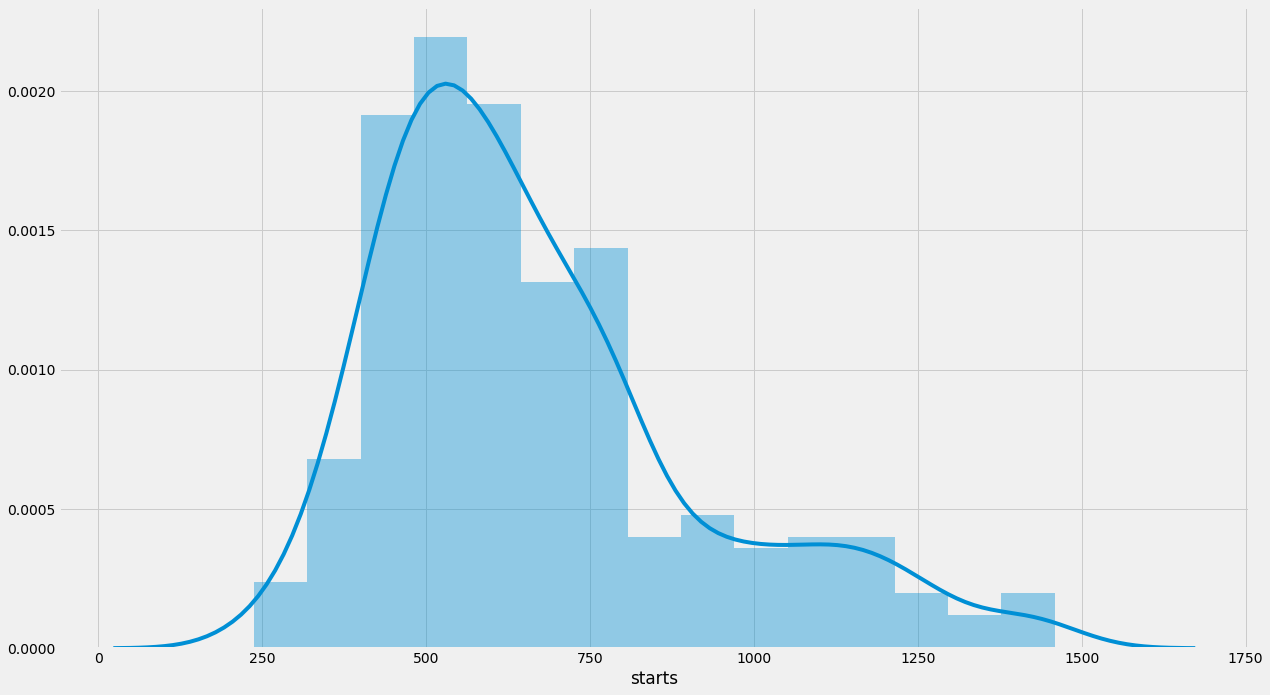

In [ ]:
sb.distplot(dfnew.starts)

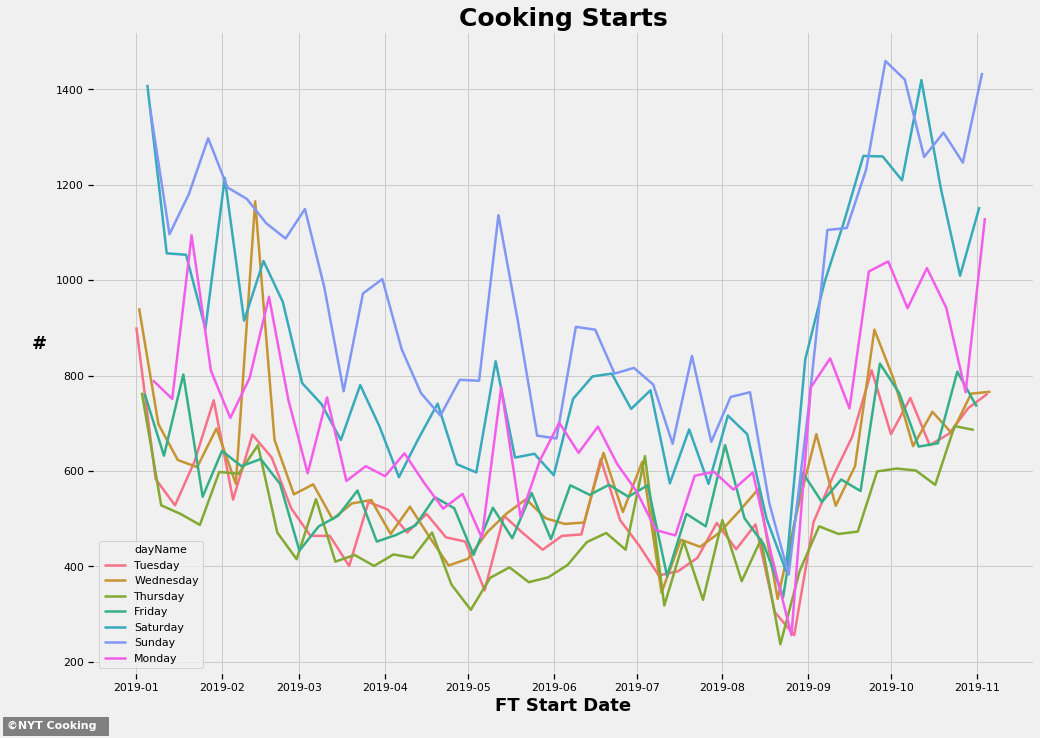

In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')   #bmh, ggplot,seaborn-notebook,seaborn-deep,dark_background
rcParams['figure.figsize'] = 15,11

sb.set_context("notebook",font_scale=1.001,rc={"lines.linewidth":2.5})
sb.lineplot(x="start_date", y="starts", hue="dayName", data=dfnew)   # Percent Hit WALL 
#sb.lineplot(x="day", y="paywall", hue="dayName", data=df)   # Number Hit Wall 
plt.title('Cooking FTs',fontsize=25,weight='bold')
plt.ylabel('#    ', fontsize=18, rotation=0, weight='bold')
plt.xlabel('FT Start Date',fontsize=18, weight='bold')
#plt.text(x=1, y=1000, s='NYT Cooking', fontsize=9, color='#f0f0f0',backgroundcolor='grey')
plt.figtext(0, 0,'©NYT Cooking  ', fontsize=11, color='white',backgroundcolor='grey',weight= 'bold') #rotation=0, #color='black')
plt.show() 